In [1]:
%pip install sox
%pip install nussl
%pip install common
%%capture
%pip install git+https://github.com/source-separation/tutorial
%pip install librosa==0.9.2

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: distro-info 1.1build1 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: distro-info 1.1build1 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
Note: you may need to restart the kernel to use updated packages.
Defaulting to 

UsageError: Line magic function `%%capture` not found.


In [2]:
#   imports
import warnings
warnings.simplefilter('ignore')
import nussl
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint
from common import viz

In [3]:
from moisesdb.dataset import MoisesDB

sample_rate = 44100

db = MoisesDB(
    data_path='./moisesdb',
    sample_rate=sample_rate
)

Loading tracks info from provider moisesdb_v0.1: 100%|██████████| 240/240 [00:00<00:00, 723.78it/s]


In [4]:
print(f"Default sample rate: {nussl.constants.DEFAULT_SAMPLE_RATE}")

Default sample rate: 44100


In [5]:
n_songs = len(db)
print(n_songs)

240


In [6]:
track = db[0] # Retorna objeto MoisesDBTrack

stems = track.stems # Retorna um dicionário em que as chaves são as stems que a track contém 
                    #   e o valor um nd.array que contém o áudio da stem
print("Dicionário de stems: ", stems)
print("\nStems disponíveis: ", stems.keys())

Dicionário de stems:  {'vocals': array([[ 0.0000000e+00, -1.1920929e-07, -1.1920929e-07, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00, -1.1920929e-07, -1.1920929e-07, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00]], dtype=float32), 'bass': array([[ 0.0000000e+00, -1.1920929e-07, -1.1920929e-07, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00, -1.1920929e-07, -1.1920929e-07, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00]], dtype=float32), 'drums': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32), 'other_keys': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)}

Stems disponíveis:  dict_keys(['vocals', 'bass', 'drums', 'other_keys'])


In [7]:
mixture = track.audio # Retorna um nd.array com a mistura

The MoisesDBTrack object also contains other non-audio information from the track such as:

track.id
track.provider
track.artist
track.name
track.genre
track.sources
track.bleedings
track.activity

In [8]:
print(type(mixture))
print(mixture.shape)

<class 'numpy.ndarray'>
(2, 6758458)


In [9]:
signal1 = nussl.AudioSignal(audio_data_array = mixture, sample_rate = sample_rate)
signal1.embed_audio()
print(signal1)

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

AudioSignal (unlabeled): 153.253 sec @ path unknown, 44100 Hz, 2 ch.


In [10]:
print("Duration: {} seconds".format(signal1.signal_duration))
print("Duration in samples: {} samples".format(signal1.signal_length))
print("Number of channels: {} channels".format(signal1.num_channels))
print("File name: {}".format(signal1.file_name))
print("Full path to input: {}".format(signal1.path_to_input_file))
print("Root mean square energy: {:.4f}".format(signal1.rms().mean()))

Duration: 153.25301587301587 seconds
Duration in samples: 6758458 samples
Number of channels: 2 channels
File name: None
Full path to input: None
Root mean square energy: 0.0769


In [11]:
stft = signal1.stft()
print(stft.shape) # A primeira dimensão é o num de fft bins em cada 'hop', a segunda a duração do sinal em 'hops' 
                    #  e a terceira o num de canais do sinal

(1025, 13202, 2)


In [12]:
#   Power-spectogram
psd = signal1.power_spectrogram_data
print(psd.shape)

(1025, 13202, 2)


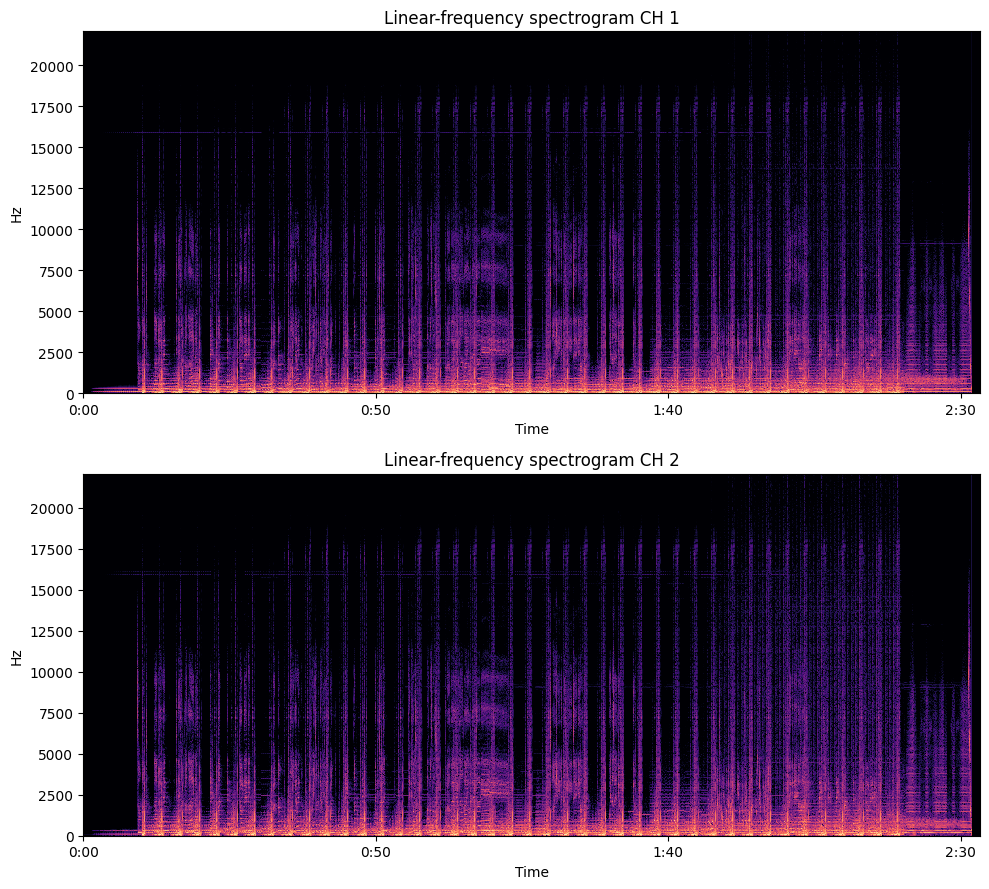

In [14]:
plt.figure(figsize=(10, 9))

plt.subplot(211)
plt.title('Linear-frequency spectrogram CH 1')
nussl.utils.visualize_spectrogram(signal1, ch=0)

plt.subplot(212)
plt.title('Linear-frequency spectrogram CH 2')
nussl.utils.visualize_spectrogram(signal1, ch=1)

plt.tight_layout()
plt.show()

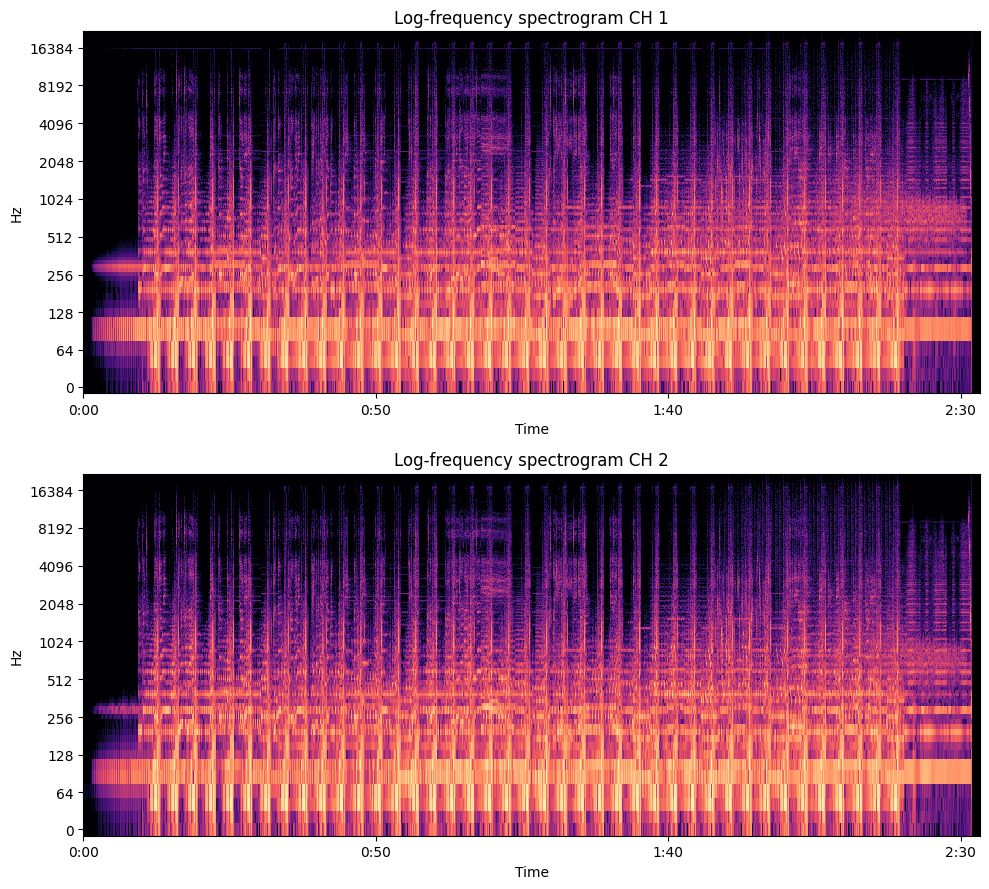

In [15]:
plt.figure(figsize=(10, 9))

plt.subplot(211)
plt.title('Log-frequency spectrogram CH 1')
nussl.utils.visualize_spectrogram(signal1, ch=0, y_axis='log')

plt.subplot(212)
plt.title('Log-frequency spectrogram CH 2')
nussl.utils.visualize_spectrogram(signal1, ch=1, y_axis='log')

plt.tight_layout()
plt.show()

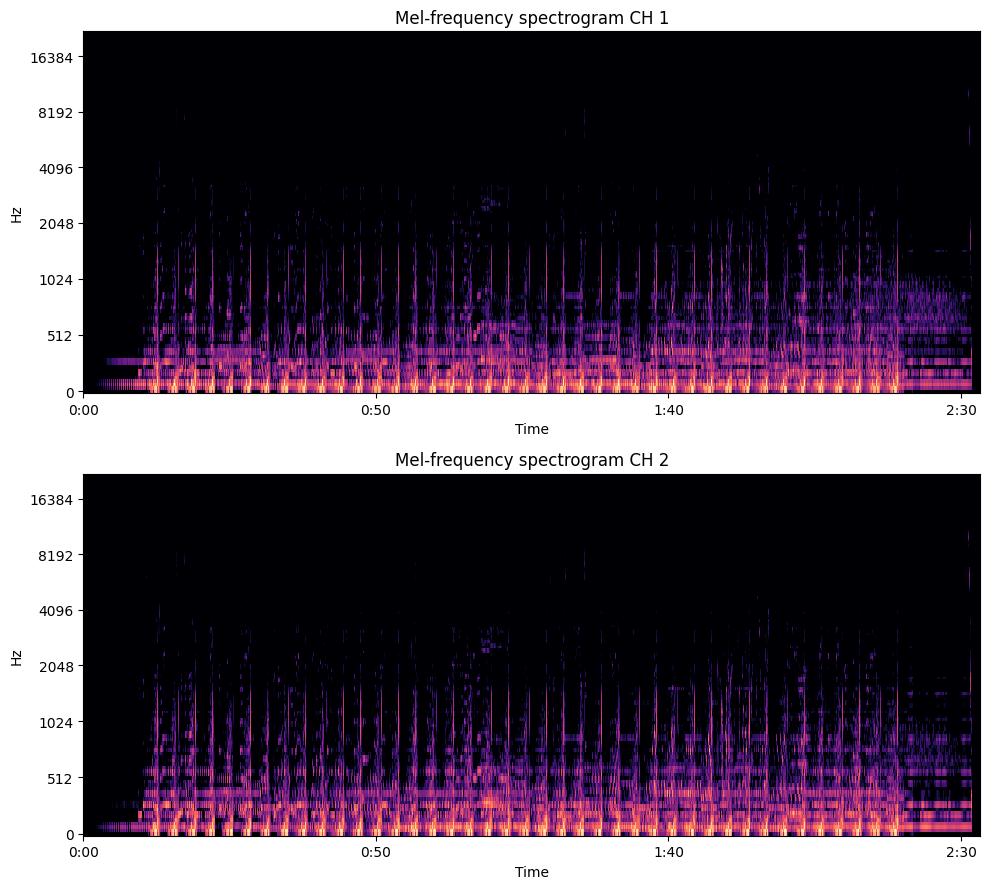

In [16]:
plt.figure(figsize=(10, 9))

plt.subplot(211)
plt.title('Mel-frequency spectrogram CH 1')
nussl.utils.visualize_spectrogram(signal1, ch=0, y_axis='mel')


plt.subplot(212)
plt.title('Mel-frequency spectrogram CH 2')
nussl.utils.visualize_spectrogram(signal1, ch=1, y_axis='mel')


plt.tight_layout()
plt.show()